Making plots and static or interactive visualizations is one of the most important tasks
in data analysis. It may be a part of the exploratory process; for example, helping identify
outliers, needed data transformations, or coming up with ideas for models. For
others, building an interactive visualization for the web using a toolkit like d3.js (http:
//d3js.org/) may be the end goal. Python has many visualization tools (see the end of
this chapter), but I’ll be mainly focused on matplotlib (http://matplotlib.sourceforge
.net).
matplotlib is a (primarily 2D) desktop plotting package designed for creating publication-
quality plots. The project was started by John Hunter in 2002 to enable a MATLAB-
like plotting interface in Python. He, Fernando Pérez (of IPython), and others have
collaborated for many years since then to make IPython combined with matplotlib a
very functional and productive environment for scientific computing. When used in
tandem with a GUI toolkit (for example, within IPython), matplotlib has interactive
features like zooming and panning. It supports many different GUI backends on all
operating systems and additionally can export graphics to all of the common vector
and raster graphics formats: PDF, SVG, JPG, PNG, BMP, GIF, etc. I have used it to
produce almost all of the graphics outside of diagrams in this book.
matplotlib has a number of add-on toolkits, such as mplot3d for 3D plots and basemap
for mapping and projections. I will give an example using basemap to plot data on a map
and to read shapefiles at the end of the chapter.
To follow along with the code examples in the chapter, make sure you have started
IPython in Pylab mode (ipython --pylab) or enabled GUI event loop integration with
the %gui magic.

## A Brief matplotlib API Primer

There are several ways to interact with matplotlib. The most common is through pylab
mode in IPython by running ipython --pylab. This launches IPython configured to be
able to support the matplotlib GUI backend of your choice (Tk, wxPython, PyQt, Mac
219
www.it-ebooks.info

OS X native, GTK). For most users, the default backend will be sufficient. Pylab mode
also imports a large set of modules and functions into IPython to provide a more MATLAB-
like interface. You can test that everything is working by making a simple plot:


In [1]:
from pandas import Series, DataFrame
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
%matplotlib inline

While the pandas plotting functions described later deal with many of the mundane
details of making plots, should you wish to customize them beyond the function options
provided you will need to learn a bit about the matplotlib API.

### Figures and Subplots

Plots in matplotlib reside within a Figure object. You can create a new figure with
plt.figure:

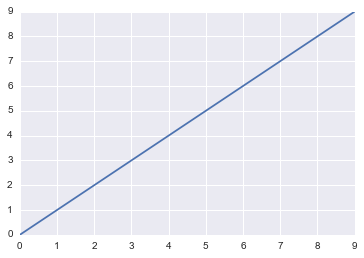

In [2]:
## Question: Different from textbook content here because content from textbook can't be run!!!
sr = Series(np.arange(10))
sr.plot()

In [3]:
fig = plt.figure()

If you are in pylab mode in IPython, a new empty window should pop up. plt.fig
ure has a number of options, notably figsize will guarantee the figure has a certain size
and aspect ratio if saved to disk. Figures in matplotlib also support a numbering scheme
(for example, plt.figure(2)) that mimics MATLAB. You can get a reference to the
active figure using plt.gcf().

You can’t make a plot with a blank figure. You have to create one or more subplots
using add_subplot:

In [4]:
# Why isn't any of the above shown???
ax1 = fig.add_subplot(2, 2, 1)

This means that the figure should be 2 × 2, and we’re selecting the first of 4 subplots
(numbered from 1). If you create the next two subplots, you’ll end up with a figure that
looks like Figure 8-2.

In [42]:
ax2 = fig.add_subplot(2, 2, 2)

In [44]:
ax3 = fig.add_subplot(2, 2, 3)

When you issue a plotting command like plt.plot([1.5, 3.5, -2, 1.6]), matplotlib
draws on the last figure and subplot used (creating one if necessary), thus hiding the
figure and subplot creation. Thus, if we run the following command, you’ll get something
like Figure 8-3:

In [44]:
from numpy.random import randn 

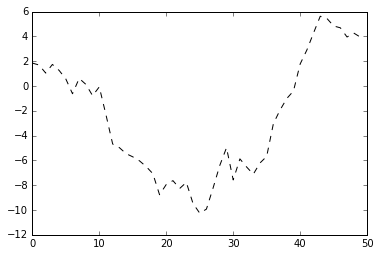

In [45]:
plt.plot(randn(50).cumsum(), 'k--')

The 'k--' is a style option instructing matplotlib to plot a black dashed line. The objects
returned by fig.add_subplot above are AxesSubplot objects, on which you can directly
plot on the other empty subplots by calling each one’s instance methods, see Figure 8-4:

In [31]:
# Question: Why isnt showing the histogram??
a = ax1.hist(randn(100), bins = 20, color = 'k', alpha = 0.3)

In [35]:
# Question: Again, why not showing????
ax2.scatter(np.arange(30), np.arange(30) + 3*randn(30))

You can find a comprehensive catalogue of plot types in the matplotlib documentation.
Since creating a figure with multiple subplots according to a particular layout is such
a common task, there is a convenience method, plt.subplots, that creates a new figure
and returns a NumPy array containing the created subplot objects:

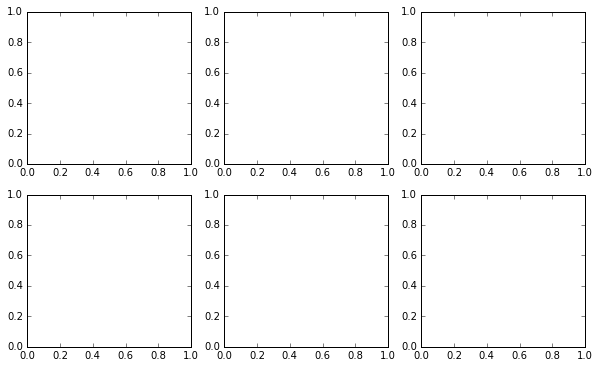

In [3]:
fig, axes = plt.subplots(2,3, figsize = (10,6))

In [45]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009355DA0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000092FEF28>]], dtype=object)

This is very useful as the axes array can be easily indexed like a two-dimensional array;
for example, axes[0, 1]. You can also indicate that subplots should have the same X
or Y axis using sharex and sharey, respectively. This is especially useful when comparing
data on the same scale; otherwise, matplotlib auto-scales plot limits independently. See
Table 8-1 for more on this method.

Argument Description

nrows         Number of rows of subplots

ncols         Number of columns of subplots

sharex        All subplots should use the same X-axis ticks (adjusting the xlim will affect all subplots)

sharey        All subplots should use the same Y-axis ticks (adjusting the ylim will affect all subplots)

subplot_kw    Dict of keywords for creating the

**fig_kw Additional keywords to subplots are used when creating the figure, such as plt.subplots(2, 2,
figsize=(8, 6))

#### Adjusting the spacing around subplots

By default matplotlib leaves a certain amount of padding around the outside of the
subplots and spacing between subplots. This spacing is all specified relative to the
height and width of the plot, so that if you resize the plot either programmatically or
manually using the GUI window, the plot will dynamically adjust itself. The spacing
can be most easily changed using the subplots_adjust Figure method, also available as
a top-level function:

In [101]:
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

NameError: name 'subplots_adjust' is not defined

wspace and hspace controls the percent of the figure width and figure height, respectively,
to use as spacing between subplots. Here is a small example where I shrink the
spacing all the way to zero (see Figure 8-5):

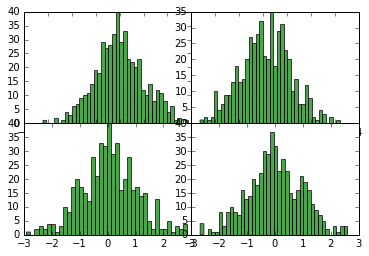

In [4]:
fig, axes = plt.subplots(2, 2, sharex=False, sharey=False)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=40, color='g', alpha=0.7)
plt.subplots_adjust(wspace=0, hspace=0)

You may notice that the axis labels overlap. matplotlib doesn’t check whether the labels
overlap, so in a case like this you would need to fix the labels yourself by specifying
explicit tick locations and tick labels. More on this in the coming sections.

### Colors, Markers, and Line Styles

Matplotlib’s main plot function accepts arrays of X and Y coordinates and optionally
a string abbreviation indicating color and line style. For example, to plot x versus y with
green dashes, you would execute:


In [76]:
from pandas import Series, DataFrame
# I myself added the use of Series to make sure at least this set of code can be run
ax = Series(np.random.randn(20))

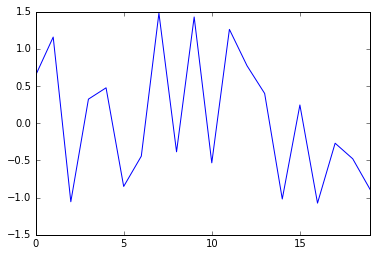

In [103]:
ax.plot();

This way of specifying both color and linestyle in a string is provided as a convenience;
in practice if you were creating plots programmatically you might prefer not to have to
munge strings together to create plots with the desired style. The same plot could also
have been expressed more explicitly as:

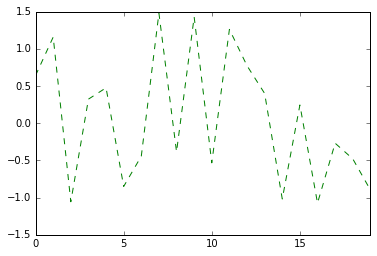

In [105]:
ax.plot(linestyle='--', color='g')
#ax.plot(x, y, linestyle='--', color='g') from the textbook is not working!!

There are a number of color abbreviations provided for commonly-used colors, but any
color on the spectrum can be used by specifying its RGB value (for example, '#CECE
CE'). You can see the full set of linestyles by looking at the docstring for plot.
Line plots can additionally have markers to highlight the actual data points. Since matplotlib
creates a continuous line plot, interpolating between points, it can occasionally
be unclear where the points lie. The marker can be part of the style string, which must
have color followed by marker type and line style (see Figure 8-6):

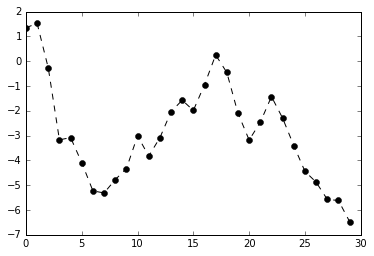

In [117]:
plt.plot(randn(30).cumsum(), 'ko--')

This could also have been written more explicitly as:

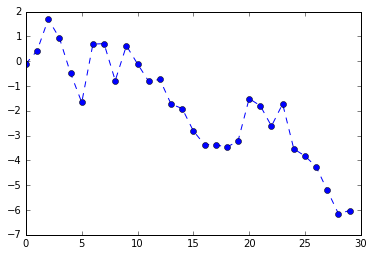

In [123]:
plt.plot(randn(30).cumsum(), color='b', linestyle='dashed', marker='o');

For line plots, you will notice that subsequent points are linearly interpolated by default.
This can be altered with the drawstyle option:

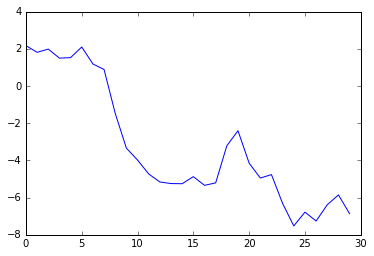

In [125]:
data = randn(30).cumsum()
plt.plot(data)

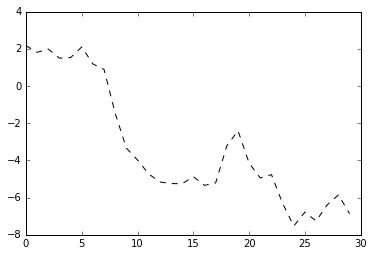

In [128]:
plt.plot(data, 'k--', label='Default')

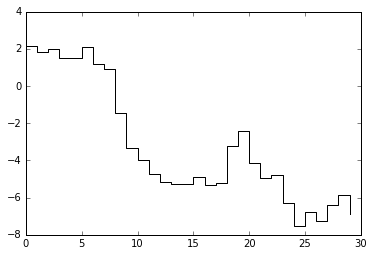

In [133]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

C:\Users\Brad Sun\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


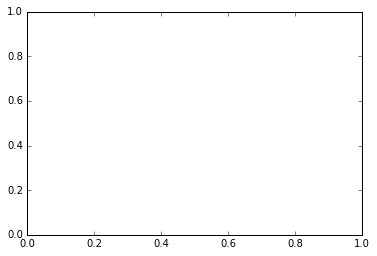

In [5]:
plt.legend(loc='best')

### Ticks, Lables and Legends

For most kinds of plot decorations, there are two main ways to do things: using the
procedural pyplot interface (which will be very familiar to MATLAB users) and the
more object-oriented native matplotlib API.
The pyplot interface, designed for interactive use, consists of methods like xlim,
xticks, and xticklabels. These control the plot range, tick locations, and tick labels,
respectively. They can be used in two ways:

Called with no arguments returns the current parameter value. For example
plt.xlim() returns the current X axis plotting range

Called with parameters sets the parameter value. So plt.xlim([0, 10]), sets the X
axis range to 0 to 10

All such methods act on the active or most recently-created AxesSubplot. Each of them
corresponds to two methods on the subplot object itself; in the case of xlim these are
ax.get_xlim and ax.set_xlim. I prefer to use the subplot instance methods myself in
the interest of being explicit (and especially when working with multiple subplots), but
you can certainly use whichever you find more convenient.

   #### Setting the titles, axis lables, ticks, and ticklables

To illustrate customizing the axes, I’ll create a simple figure and plot of a random walk
(see Figure 8-8):

In [6]:
fig = plt.figure()

In [7]:
ax = fig.add_subplot(1, 1, 1)

In [8]:
ax.plot(np.random.randn(1000).cumsum())

Brad's got really confused about this section from the textbook, so he decided to fuck the book and try/explore it himself

In [9]:
#Brad's practice here
from numpy.random import randn

In [10]:
# Establish financial data
sr1 = Series(randn(1000)).cumsum()
sr2 = Series(randn(500)).cumsum()
sr3 = Series(randn(100)).cumsum()
sr4 = Series(randn(50)).cumsum()

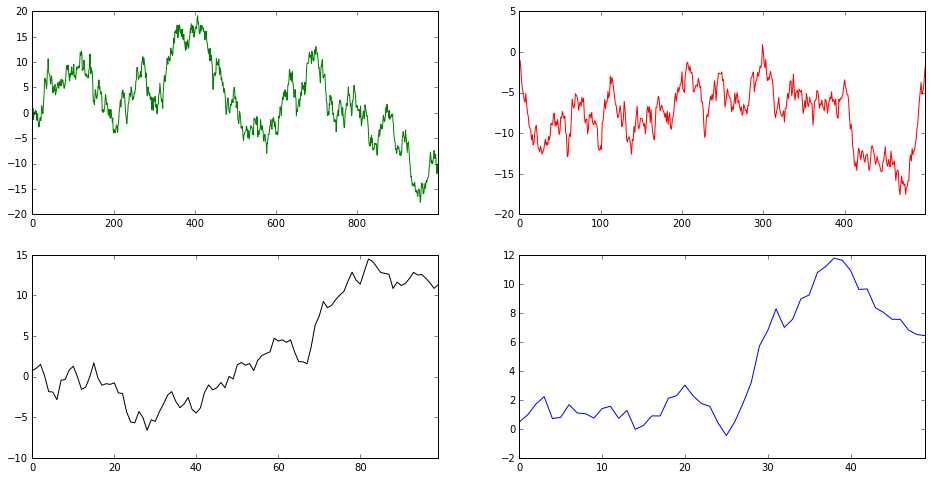

In [11]:
# Establish Plotting Frames
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)   # rows, columns, # location
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sr1.plot(ax = ax1, color = 'g', figsize = (16,8))
sr2.plot(ax = ax2, color = 'r', figsize = (16,8))
sr3.plot(ax = ax3, color = 'k', figsize = (16,8))
sr4.plot(ax = ax4, color = 'b', figsize = (16,8))

To change the X axis ticks, it’s easiest to use set_xticks and set_xticklabels. The
former instructs matplotlib where to place the ticks along the data range; by default
these locations will also be the labels. But we can set any other values as the labels using
set_xticklabels:

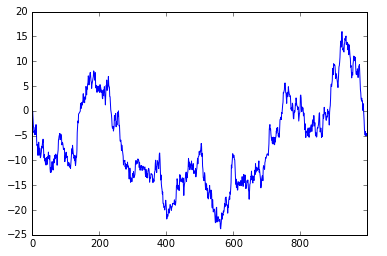

In [12]:
# Let's change the X axis 
sr1 = Series(randn(1000)).cumsum()
sr1.plot(ax = ax, color = 'g', figsize = (16,8))

# Set up which points I am to change and replace
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
# These are the targets I want to replace to:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation = 30, fontsize = 'small')

ax.set_title('My First matplotlib plot')

sr1.plot()

In [13]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation = 30, fontsize = 'small')

Lastly, set_xlabel gives a name to the X axis and set_title the subplot title:

In [14]:
ax.set_title('My First Matplotlib Plot')

In [15]:
ax.set_xlabel('Stage')

In [16]:
ax.plot()

[]

#### Adding Legends

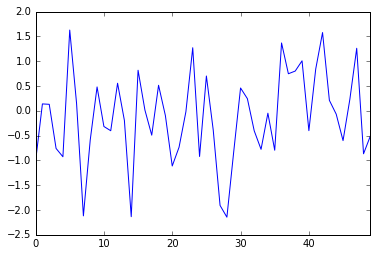

In [17]:
# Brad's got confused since all the above can't show the plots, so he decided to dig deeper into it by improvising
a = Series(np.random.randn(50))
a.plot()

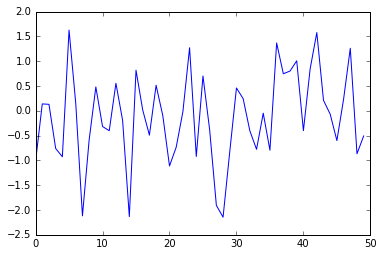

In [18]:
plt.plot(a)
# So the conclusion here is that a.plot() is the same as plt.plot(a)

### Anotations and Drawing on a Subplot

In addition to the standard plot types, you may wish to draw your own plot annotations,
which could consist of text, arrows, or other shapes.Annotations and text can be added using the text, arrow, and annotate functions. 

text draws text at given coordinates (x, y) on the plot with optional custom styling:

In [19]:
ax.text(x, y, 'Hello world!',
    family='monospace', fontsize=10)

NameError: name 'x' is not defined

Annotations can draw both text and arrows arranged appropriately. As an example,
let’s plot the closing S&P 500 index price since 2007 (obtained from Yahoo! Finance)
and annotate it with some of the important dates from the 2008-2009 financial crisis.
See Figure 8-11 for the result:

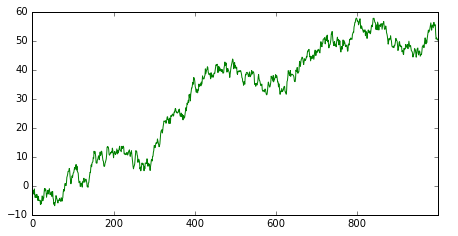

In [20]:
# Refer to 1.3.1
sr1 = Series(randn(1000)).cumsum()

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)   # rows, columns, # location
sr1.plot(ax = ax1, color = 'g', figsize = (16,8))


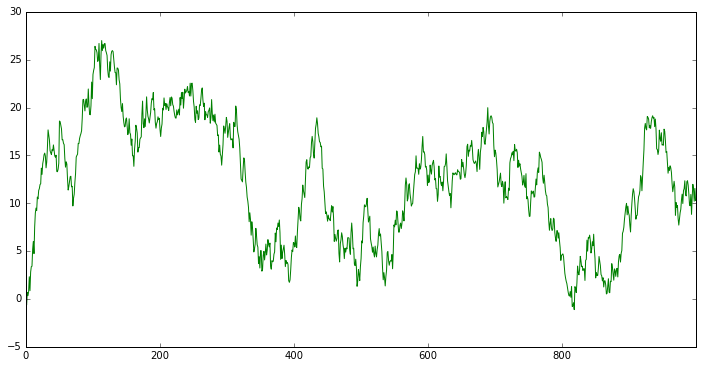

In [21]:
# If I just need to generate one graph:
sr1 = Series(randn(1000)).cumsum()
sr1.plot(color = 'g', figsize = (12,6))

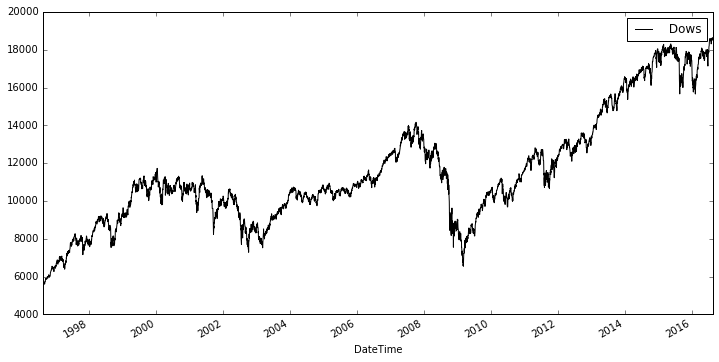

In [22]:
#Based on the logic above, breakdown each step from below
from datetime import datetime
data = pd.read_csv('Dows.csv', index_col=0, parse_dates=True) #Parse_dates make the dates very clean
dt = pd.DataFrame(data)
dt.plot(style = 'k-', figsize = (12,6))
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
    ]



C:\Users\Brad Sun\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


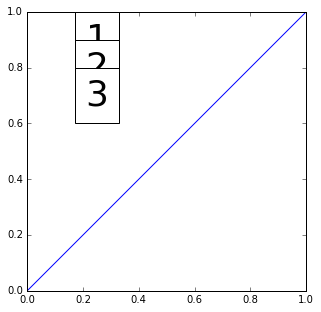

In [23]:
import matplotlib.pylab as plt
fig = plt.figure(figsize = (5,5))
ax = plt.subplot(111)
ax.plot([0,1], [0,1])

txts = ['1', '2', '3']
y_coords = [0.9, 0.8, 0.7]
for txt, y_coord in zip(txts, y_coords):
    ax.annotate(txt, xy = (0.25, y_coord), \
        size=36, va='center', ha='center', fontname = 'Helvetica', \
        bbox=dict(boxstyle='square', fc = 'w'))

plt.savefig('Test.pdf', bbox_inches = 'tight', pad_inches = 0)
plt.savefig('Test.jpg', bbox_inches = 'tight', pad_inches = 0)

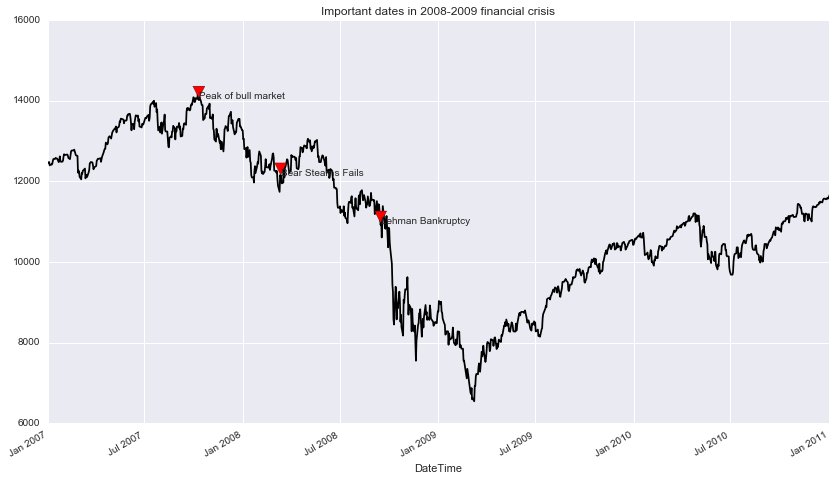

In [6]:
# Finally got this project done!!
# Goal: Generate 3 important dates for the 2008 financial crisis
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('Dows.csv', index_col=0, parse_dates=True)
dow = data['Dows'][2666:]

dow.plot(ax=ax, style='k-', figsize = (14,8))

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
    ]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, dow.asof(date) + 50),
        xytext=(date, dow.asof(date) + 200),
        arrowprops=dict(facecolor='red'),        
        horizontalalignment='left', verticalalignment='top')  
  
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([6000, 16000])
ax.set_title('Important dates in 2008-2009 financial crisis')  

See the online matplotlib gallery for many more annotation examples to learn from.
Drawing shapes requires some more care. matplotlib has objects that represent many
common shapes, referred to as patches. Some of these, like Rectangle and Circle are
found in matplotlib.pyplot, but the full set is located in matplotlib.patches.

To add a shape to a plot, you create the patch object shp and add it to a subplot by
calling ax.add_patch(shp) (see Figure 8-12):

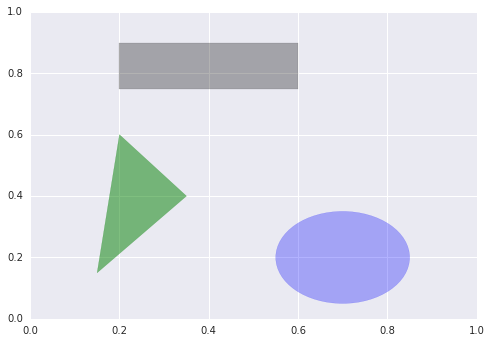

In [107]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                    color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

If you look at the implementation of many familiar plot types, you will see that they
are assembled from patches.

In [108]:
# Test the current environment version
import sys
print (sys.version)

3.4.5 |Anaconda custom (64-bit)| (default, Jul  5 2016, 14:53:07) [MSC v.1600 64 bit (AMD64)]


### Saving Plots to Files

The active figure can be saved to file using plt.savefig. This method is equivalent to
the figure object’s savefig instance method. For example, to save an SVG version of a
figure, you need only type:

In [111]:
plt.savefig('figpath.svg')

The file type is inferred from the file extension. So if you used .pdf instead you would
get a PDF. There are a couple of important options that I use frequently for publishing
graphics: dpi, which controls the dots-per-inch resolution, and bbox_inches, which can
trim the whitespace around the actual figure. To get the same plot as a PNG above with
minimal whitespace around the plot and at 400 DPI, you would do:

savefig doesn’t have to write to disk; it can also write to any file-like object, such as a
StringIO:

In [113]:
from io import StringIO
buffer = StringIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

TypeError: string argument expected, got 'bytes'

For example, this is useful for serving dynamically-generated images over the web.

Argument                Description

fname                   String containing a filepath or a Python file-like object. The figure format is inferred from the file
                        extension, e.g. .pdf for PDF or .png for PNG.
               
dpi                     The figure resolution in dots per inch; defaults to 100 out of the box but can be configured

facecolor, edge color   The color of the figure background outside of the subplots. 'w' (white), by default

format                  The explicit file format to use ('png', 'pdf', 'svg', 'ps', 'eps', ...)

bbox_inches             The portion of the figure to save. If 'tight' is passed, will attempt to trim the empty space around
                        the figure

### Matplotlib Configuration

matplotlib comes configured with color schemes and defaults that are geared primarily
toward preparing figures for publication. Fortunately, nearly all of the default behavior
can be customized via an extensive set of global parameters governing figure size, subplot
spacing, colors, font sizes, grid styles, and so on. There are two main ways to
interact with the matplotlib configuration system. The first is programmatically from
Python using the rc method. For example, to set the global default figure size to be 10
x 10, you could enter:

In [115]:
plt.rc('figure', figsize = (10,10))

The first argument to rc is the component you wish to customize, such as 'figure',
'axes', 'xtick', 'ytick', 'grid', 'legend' or many others. After that can follow a
sequence of keyword arguments indicating the new parameters. An easy way to write
down the options in your program is as a dict:

In [120]:
font_options = {'family' : 'monospace',
    'weight' : 'bold',
    'size' : '45'}
plt.rc('font', **font_options)

For more extensive customization and to see a list of all the options, matplotlib comes
with a configuration file matplotlibrc in the matplotlib/mpl-data directory. If you customize
this file and place it in your home directory titled .matplotlibrc, it will be loaded
each time you use matplotlib.

## Plotting Functions in Pandas

As you’ve seen, matplotlib is actually a fairly low-level tool. You assemble a plot from
its base components: the data display (the type of plot: line, bar, box, scatter, contour,
etc.), legend, title, tick labels, and other annotations. Part of the reason for this is that
in many cases the data needed to make a complete plot is spread across many objects.
In pandas we have row labels, column labels, and possibly grouping information. This
means that many kinds of fully-formed plots that would ordinarily require a lot of
matplotlib code can be expressed in one or two concise statements. Therefore, pandas
has an increasing number of high-level plotting methods for creating standard visualizations
that take advantage of how data is organized in DataFrame objects.

As of this writing, the plotting functionality in pandas is undergoing
quite a bit of work. As part of the 2012 Google Summer of Code program,
a student is working full time to add features and to make the
interface more consistent and usable. Thus, it’s possible that this code
may fall out-of-date faster than the other things in this book. The online
pandas documentation will be the best resource in that event.

### Line Plots

Series and DataFrame each have a plot method for making many different plot types.
By default, they make line plots (see Figure 8-13):

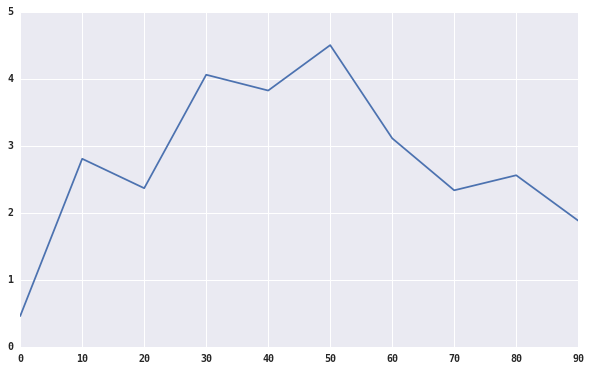

In [134]:
# arange([start,] stop[, step,], dtype=None)
# Return evenly spaced values within a given interval.
s = Series(np.random.randn(10).cumsum(), index = np.arange(0, 100, 10))
s.plot(figsize = (10,6))

The Series object’s index is passed to matplotlib for plotting on the X axis, though this
can be disabled by passing use_index=False. The X axis ticks and limits can be adjusted
using the xticks and xlim options, and Y axis respectively using yticks and ylim. See Table 8-3 for a full listing of plot options. I’ll comment on a few more of them throughout
this section and leave the rest to you to explore.

Most of pandas’s plotting methods accept an optional ax parameter, which can be a
matplotlib subplot object. This gives you more flexible placement of subplots in a grid
layout. There will be more on this in the later section on the matplotlib API.
DataFrame’s plot method plots each of its columns as a different line on the same
subplot, creating a legend automatically (see Figure 8-14):

In [137]:
np.random.randn?

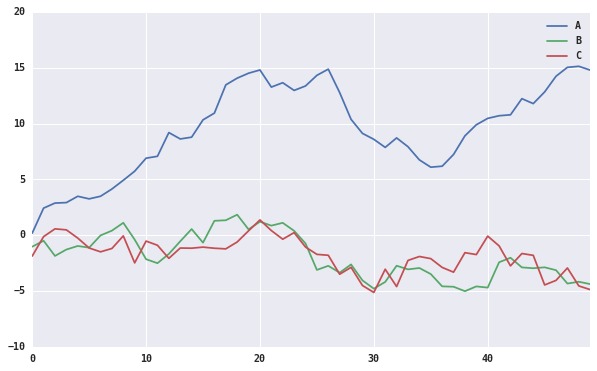

In [146]:
# 3: Three sets of time series(columns); 
# 50: 50 values on the X axis
# 1: the distance of interval, meaning "show every ONE step" 
df = DataFrame(np.random.randn(50, 3).cumsum(0),
    columns=['A', 'B', 'C'],
    index=np.arange(0, 50, 1))
df.plot(figsize = (10,6))


Additional keyword arguments to plot are passed through to the respective
matplotlib plotting function, so you can further customize
these plots by learning more about the matplotlib API.

Table 8-3. Series.plot method arguments

Argument   Description

label: Label for plot legend

ax: matplotlib subplot object to plot on. If nothing passed, uses active matplotlib subplot

style: Style string, like 'ko--', to be passed to matplotlib.

alpha: The plot fill opacity (from 0 to 1)

Argument Description (continued from above)

kind: Can be 'line', 'bar', 'barh', 'kde'

logy: Use logarithmic scaling on the Y axis

use_index: Use the object index for tick labels

rot: Rotation of tick labels (0 through 360)

xticks: Values to use for X axis ticks

yticks: Values to use for Y axis ticks

xlim: X axis limits (e.g. [0, 10])

ylim: Y axis limits

grid: Display axis grid (on by default)

DataFrame has a number of options allowing some flexibility with how the columns
are handled; for example, whether to plot them all on the same subplot or to create
separate subplots. See Table 8-4 for more on these. 

Table 8-4. DataFrame-specific plot arguments

Argument Description

subplots: Plot each DataFrame column in a separate subplot

sharex: If subplots=True, share the same X axis, linking ticks and limits

sharey: If subplots=True, share the same Y axis

figsize: Size of figure to create as tuple

title: Plot title as string

legend: Add a subplot legend (True by default)

sort_columns: Plot columns in alphabetical order; by default uses existing column order

### Bar Plots

Making bar plots instead of line plots is a simple as passing kind='bar' (for vertical
bars) or kind='barh' (for horizontal bars). In this case, the Series or DataFrame index
will be used as the X (bar) or Y (barh) ticks (see Figure 8-15):

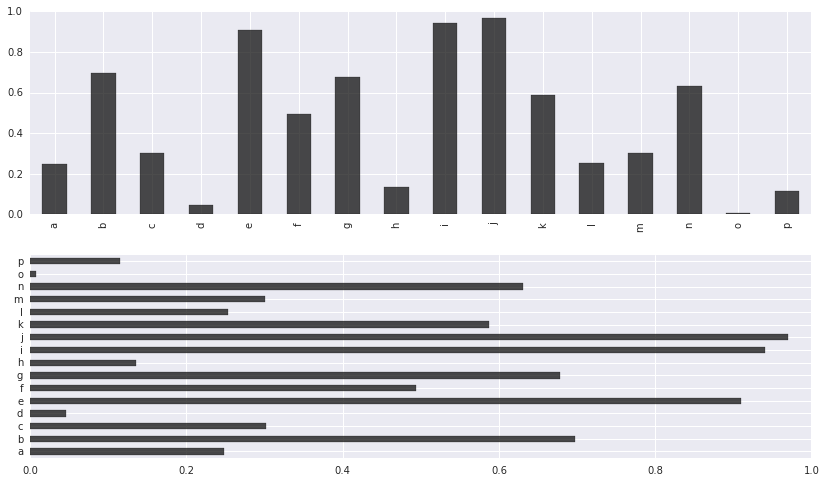

In [17]:
# Got very much enlightened here regarding a long-lasting confused question: why sometimes when hit run it just generates 
# some text like: <matplotlib.axes._subplots.AxesSubplot at 0x1488eb00>, without a figure shown?
# The answer is I should combine all the codes together in just one cell instead of breaking them down.

fig, axes = plt.subplots(2, 1)
# Step One: what's to be plotted?
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
# Step Two: how is it to be plotted?
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7, figsize = (14,8))
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

With a DataFrame, bar plots group the values in each row together in a group in bars,
side by side, for each value. See Figure 8-16:

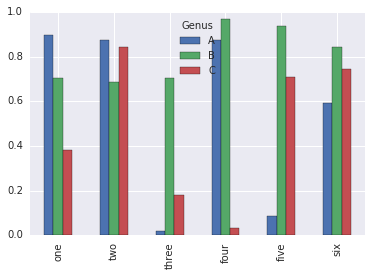

In [18]:
# Step Three: Asign all the details

df = DataFrame(np.random.rand(6, 3),
    index=['one', 'two', 'three', 'four', 'five', 'six'],
    columns=pd.Index(['A', 'B', 'C'], name='Genus'))
df
df.plot(kind = 'bar')

Note that the name “Genus” on the DataFrame’s columns is used to title the legend.
Stacked bar plots are created from a DataFrame by passing stacked=True, resulting in
the value in each row being stacked together (see Figure 8-17):

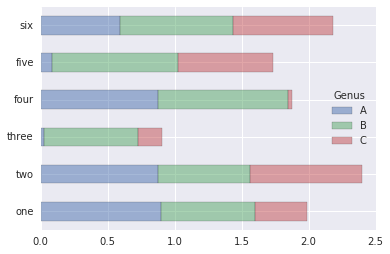

In [23]:
df.plot(kind='barh', stacked=True, alpha=0.5)

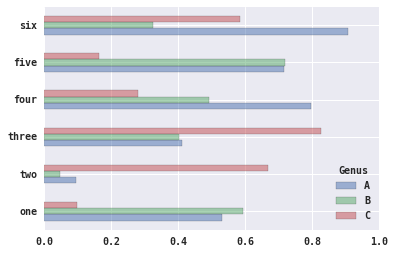

In [189]:
df.plot(kind='barh', stacked=False, alpha=0.5)

A useful recipe for bar plots (as seen in an earlier chapter) is to visualize
a Series’s value frequency using value_counts: s.value_counts
().plot(kind='bar')

For more on the plt.subplots function and matplotlib axes and figures,
see the later section in this chapter.

Returning to the tipping data set used earlier in the book, suppose we wanted to make
a stacked bar plot showing the percentage of data points for each party size on each
day. I load the data using read_csv and make a cross-tabulation by day and party size:

In [11]:
# Question: Doesn't work..
tips = pd.read_csv('ch08tips.csv')
party_counts = pd.crosstab(tips.day, tips.size)

party_counts 

AttributeError: 'DataFrame' object has no attribute 'day'

In [20]:
# Even if it don'e work, I still need to figure it out since this section is about normalizing the charts, 
# which is very import to visualizatoin and thus decision-making process.
# Let's use the example from above
df

Genus,A,B,C
one,0.897743,0.705048,0.381822
two,0.872454,0.686798,0.840995
three,0.020310,0.704745,0.178777
four,0.876018,0.969617,0.031890
five,0.086214,0.934994,0.709790
six,0.593095,0.843771,0.744964


normalize so that each row sums to 1

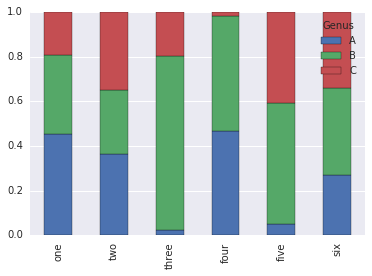

In [63]:
# Normalize to sum to 1
normed = df.div(df.sum(1).astype(float), axis=0)
normed.plot(kind = 'bar', stacked = True)

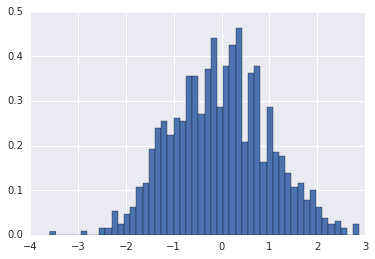

In [32]:
#Out-of-the-topic project: how to show the basic information of the plotted normal distribution?

import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(1000)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
n, bins, rectangles = ax.hist(x, 50, normed=True)
fig.canvas.draw()
plt.show()

In [56]:
# Generate the stats result
m = x.mean()
s = x.std()
v = x.var()
stats = DataFrame({'mean':m,'var':v, 's':s}, index = np.arange(1))
stats

,mean,s,var
0,-0.011859,1.007656,1.015371


In [117]:
# There's a better way to show the description of it.


AttributeError: 'numpy.ndarray' object has no attribute 'describe'

### Histograms and Density Plots

A histogram, with which you may be well-acquainted, is a kind of bar plot that gives a
discretized display of value frequency. The data points are split into discrete, evenly
spaced bins, and the number of data points in each bin is plotted. Using the tipping
data from before, we can make a histogram of tip percentages of the total bill using the
hist method on the Series (see Figure 8-19):

In [78]:
df

Genus,A,B,C
one,0.897743,0.705048,0.381822
two,0.872454,0.686798,0.840995
three,0.020310,0.704745,0.178777
four,0.876018,0.969617,0.031890
five,0.086214,0.934994,0.709790
six,0.593095,0.843771,0.744964


AttributeError: Unknown property type

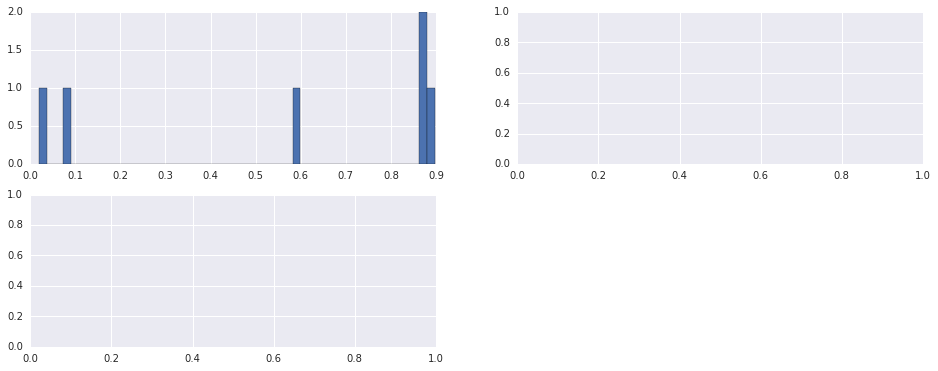

In [81]:
# No data found to be available or useful from the texbook, so might as well just show:
df.hist(bins=50, type = 'float', figsize = (16,6));

A related plot type is a density plot, which is formed by computing an estimate of a
continuous probability distribution that might have generated the observed data. A
usual procedure is to approximate this distribution as a mixture of kernels, that is,
simpler distributions like the normal (Gaussian) distribution. Thus, density plots are
also known as KDE (kernel density estimate) plots. Using plot with kind='kde' makes
a density plot using the standard mixture-of-normals KDE

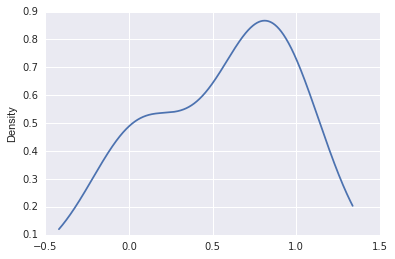

In [76]:
df['A'].plot(kind = 'kde')

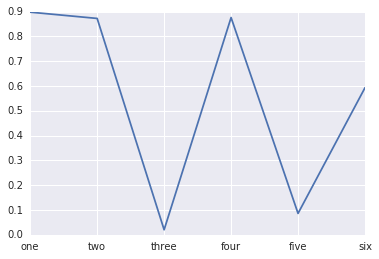

In [77]:
# Let's see what normal graph is like
df['A'].plot()

In [88]:
comp1 = np.random.normal(0, 1, size=200)

In [89]:
comp2 = np.random.normal(10, 2, size = 200)

In [90]:
values = Series(np.concatenate([comp1, comp2]))

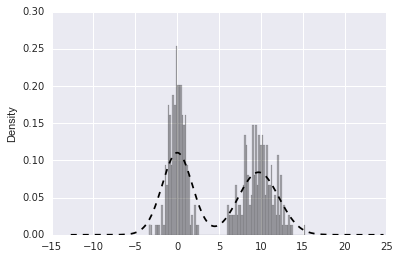

In [91]:
values.hist(bins = 100, alpha = 0.3, color = 'k', normed = True)
values.plot(kind = 'kde', style = 'k--')

In [96]:
a = 6/25
b = 2/25

a+b

0.32

### Scatter Plots

Scatter plots are a useful way of examining the relationship between two one-dimensional
data series. matplotlib has a scatter plotting method that is the workhorse of making these kinds of plots. To give an example, I load the macrodata dataset from the statsmodels project, select a few variables, then compute log differences:

In [100]:
# Find and assign the file
macro = pd.read_csv('ch08scatterplot.csv')

In [101]:
# Find and assign the targeted data in the file
data = macro[['Dows', 'Dollar', '10yrbond']]

In [102]:
# Determine how to deal with the data
trans_data = np.log(data).diff().dropna()

In [104]:
trans_data

,Dows,Dollar,10yrbond
1,-0.004943,-0.006804,0.022359
2,0.002249,0.005235,-0.008910
3,-0.000161,0.002038,-0.027082
4,0.010380,0.004543,0.056792
5,-0.000768,0.002150,0.002201
6,0.000200,-0.002264,-0.028674
7,-0.002107,-0.005839,-0.025931
8,0.006468,0.003059,0.022888
9,-0.002044,-0.002432,-0.018850
10,0.003225,-0.000700,0.016643


It’s easy to plot a simple scatter plot using plt.scatter (see Figure 8-22):

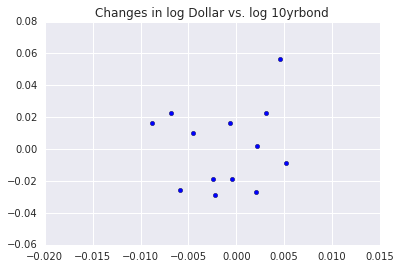

In [110]:
# Put lines of code together if want to plot different features in one graph
plt.scatter(trans_data['Dollar'], trans_data['10yrbond'])
plt.title('Changes in log %s vs. log %s' % ('Dollar', '10yrbond'))

In exploratory data analysis it’s helpful to be able to look at all the scatter plots among
a group of variables; this is known as a pairs plot or scatter plot matrix. Making such a
plot from scratch is a bit of work, so pandas has a scatter_matrix function for creating
one from a DataFrame. It also supports placing histograms or density plots of each
variable along the diagonal. See Figure 8-23 for the resulting plot:

In [115]:
# Question: doesn't work.
scatter_matrix(trans_data, color='k', alpha=0.3)

NameError: name 'scatter_matrix' is not defined

## Plotting Maps: Visualizing Haiti Earthquake Crisis Data

Ushahidi is a non-profit software company that enables crowdsourcing of information
related to natural disasters and geopolitical events via text message. Many of these data
sets are then published on their website for analysis and visualization. I downloaded the data collected during the 2010 Haiti earthquake crisis and aftermath, and I’ll show
you how I prepared the data for analysis and visualization using pandas and other tools
we have looked at thus far. After downloading the CSV file from the above link, we can
load it into a DataFrame using read_csv:

In [ ]:
# Website no longer available, so for further details refer to the content of this section in the textbook
# Here we assume the file is useful.
data = pd.read_csv('...csv')
data

It’s easy now to tinker with this data set to see what kinds of things we might want to
do with it. Each row represents a report sent from someone’s mobile phone indicating
an emergency or some other problem. Each has an associated timestamp and a location
as latitude and longitude:

In [ ]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

In [ ]:
[Output:]

INCIDENT DATE LATITUDE LONGITUDE
0 05/07/2010 17:26 18.233333 -72.533333
1 28/06/2010 23:06 50.226029 5.729886
2 24/06/2010 16:21 22.278381 114.174287
3 20/06/2010 21:59 44.407062 8.933989
4 18/05/2010 16:26 18.571084 -72.334671
5 26/04/2010 13:14 18.593707 -72.310079
6 26/04/2010 14:19 18.482800 -73.638800
7 26/04/2010 14:27 18.415000 -73.195000
8 15/03/2010 10:58 18.517443 -72.236841
9 15/03/2010 11:00 18.547790 -72.410010

The CATEGORY field contains a comma-separated list of codes indicating the type of
message:

In [ ]:
data['CATEGORY'][:6]

In [ ]:
[Output:]
0 1. Urgences | Emergency, 3. Public Health,
1 1. Urgences | Emergency, 2. Urgences logistiques
2 2. Urgences logistiques | Vital Lines, 8. Autre |
3 1. Urgences | Emergency,
4 1. Urgences | Emergency,
5 5e. Communication lines down,

If you notice above in the data summary, some of the categories are missing, so we
might want to drop these data points. Additionally, calling describe shows that there
are some aberrant locations:

In [ ]:
data.describe()

In [ ]:
[Output:]
            Serial LATITUDE LONGITUDE
count 3593.000000 3593.000000 3593.000000
mean 2080.277484 18.611495 -72.322680
std 1171.100360 0.738572 3.650776
min 4.000000 18.041313 -74.452757
25% 1074.000000 18.524070 -72.417500
50% 2163.000000 18.539269 -72.335000
75% 3088.000000 18.561820 -72.293570
max 4052.000000 50.226029 114.174287

Cleaning the bad locations and removing the missing categories is now fairly simple:

In [ ]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
    (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
    & data.CATEGORY.notnull()]

Now we might want to do some analysis or visualization of this data by category, but
each category field may have multiple categories. Additionally, each category is given
as a code plus an English and possibly also a French code name. Thus, a little bit of
wrangling is required to get the data into a more agreeable form. First, I wrote these
two functions to get a list of all the categories and to split each category into a code and
an English name:

In [ ]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

In [ ]:
def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

In [ ]:
def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

In [ ]:
You can test out that the get_english function does what you expect:
    In [101]: get_english('2. Urgences logistiques | Vital Lines')
    Out[101]: ('2', 'Vital Lines')

Waste of time to pursue since the data can't be used at this point. Refer to book.

## Python Visualization Tool Ecosystem

As is common with open source, there are a plethora of options for creating graphics
in Python (too many to list). In addition to open source, there are numerous commercial
libraries with Python bindings.

In this chapter and throughout the book, I have been primarily concerned with matplotlib
as it is the most widely used plotting tool in Python. While it’s an important
part of the scientific Python ecosystem, matplotlib has plenty of shortcomings when it
comes to the creation and display of statistical graphics. MATLAB users will likely find
matplotlib familiar, while R users (especially users of the excellent ggplot2 and trel
lis packages) may be somewhat disappointed (at least as of this writing). It is possible
to make beautiful plots for display on the web in matplotlib, but doing so often requires
significant effort as the library is designed for the printed page. Aesthetics aside, it is
sufficient for most needs. In pandas, I, along with the other developers, have sought to
build a convenient user interface that makes it easier to make most kinds of plots commonplace
in data analysis.

There are a number of other visualization tools in wide use. I list a few of them here
and encourage you to explore the ecosystem.

### Chaco

Chaco
Chaco (http://code.enthought.com/chaco/), developed by Enthought, is a plotting toolkit
suitable both for static plotting and interactive visualizations. It is especially wellsuited
for expressing complex visualizations with data interrelationships. Compared
with matplotlib, Chaco has much better support for interacting with plot elements and
rendering is very fast, making it a good choice for building interactive GUI applications.

### mayavi

The mayavi project, developed by Prabhu Ramachandran, Gaël Varoquaux, and others,
is a 3D graphics toolkit built on the open source C++ graphics library VTK. mayavi,
like matplotlib, integrates with IPython so that it is easy to use interactively. The plots
can be panned, rotated, and zoomed using the mouse and keyboard. I used mayavi to
make one of the illustrations of broadcasting in Chapter 12. While I don’t show any
mayavi-using code here, there is plenty of documentation and examples available online.
In many cases, I believe it is a good alternative to a technology like WebGL, though
the graphics are harder to share in interactive form.

### Other Packages

Of course, there are numerous other visualization libraries and applications available
in Python: PyQwt, Veusz, gnuplot-py, biggles, and others. I have seen PyQwt put to
good use in GUI applications built using the Qt application framework using PyQt.
While many of these libraries continue to be under active development (some of them are part of much larger applications), I have noted in the last few years a general trend
toward web-based technologies and away from desktop graphics. I’ll say a few more
words about this in the next section.

### The Future of Visualization Tools?

Visualizations built on web technologies (that is, JavaScript-based) appear to be the
inevitable future. Doubtlessly you have used many different kinds of static or interactive
visualizations built in Flash or JavaScript over the years. New toolkits (such as d3.js
and its numerous off-shoot projects) for building such displays are appearing all the
time. In contrast, development in non web-based visualization has slowed significantly
in recent years. This holds true of Python as well as other data analysis and statistical
computing environments like R.

The development challenge, then, will be in building tighter integration between data
analysis and preparation tools, such as pandas, and the web browser. I am hopeful that
this will become a fruitful point of collaboration between Python and non-Python users
as well.